# Capstone Project - Similarity of 10 most multicultural cities
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

With the rapid development of transportation technology, travelling around the world became an easier thing for most of the people. Successive waves of immigrants have created diverse cultural environments full of incredible restaurants, festivals and art scenes. ‘Some cities manage to fit the entire world within them’, said Cultural Trip.

Sometimes, we might be wondering, of all those large multicultural cities, which factor plays the most important role during the formation of the cities. And of all those cities, could one city be similar with another or all cities are different?

In this project, I will compare the 10 most multicultural cities in the world, to determine which one is more similar to another one. As those cities are all giant cities, we'll only focus on the center area of each city. I will compare the 10 most common veunues in the center area and cluster them into similar groups. 

## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required information:
* Most common venues in the center area will be obtained using **Foursquare API**
* Coordinate of each city's center will be obtained using **Python Geocoder Library** 
* Use **Folium** to visualize the center area of the city

In [72]:
import pandas as pd
import numpy as np
import os
import json
import requests
import geocoder
import folium

The 10 most multicultural cities are extracted from an ariticle in Culture Trip website. Original article is <a href='https://theculturetrip.com/north-america/usa/california/articles/the-10-most-multicultural-cities-in-the-world/'>here</a>.

In [181]:
cities_data = ['Toronto, Canada', 
               'Sydney, Australia', 
               'Singapore', 
               'São Paulo, Brazil', 
               'San Francisco, US', 
               'New York City, US', 
               'Paris, France', 
               'Los Angeles, US', 
               'London, UK', 
               'Amsterdam, Netherlands']

Let's use Python Geocoder to find the latitude and longitude of each city, and use the coordinates as the center of the city. Meanwhile, we'll limit the number of venues to **300** and in the radius of **5km** from the center. 

In [183]:
city_coord_list = []
radius = 5000
limit = 300
for city_name in cities_data:
    g = geocoder.arcgis(city_name)
    lat_lng_coords = g.latlng
    city_coord_list.append([city_name, lat_lng_coords[0], lat_lng_coords[1], radius, limit])

cities = pd.DataFrame(city_coord_list)
cities.columns = ['Name', 'Latitude', 'Longitude', 'Radius', 'Limit'] 

Now, we have a list of the cities with latitude, longitude, radius and limit.

In [186]:
cities

,Name,Latitude,Longitude,Radius,Limit
0,"Toronto, Canada",43.64869,-79.38544,5000,300
1,"Sydney, Australia",-33.86960,151.20691,5000,300
2,Singapore,1.29041,103.85211,5000,300
3,"São Paulo, Brazil",-23.56287,-46.65468,5000,300
4,"San Francisco, US",37.77712,-122.41964,5000,300
5,"New York City, US",40.71455,-74.00714,5000,300
6,"Paris, France",48.85717,2.34140,5000,300
7,"Los Angeles, US",34.05349,-118.24532,5000,300
8,"London, UK",51.50642,-0.12721,5000,300
9,"Amsterdam, Netherlands",52.36993,4.90788,5000,300


Let's take a look at the areas we're going to explore using folium.

In [177]:
def drawCityArea(city_name, coordinate, radius):
    m = folium.Map(
        location=coordinate,
        zoom_start=12)

    folium.Circle(
            radius=radius,
            location=coordinate,
            popup=city_name,
            color='crimson',
            fill=False,
        ).add_to(m)
    
    return(m)

In [188]:
map0 = drawCityArea(cities['Name'][0], [cities['Latitude'][0],cities['Longitude'][0]], float(cities['Radius'][0]))
map0

In [189]:
map1 = drawCityArea(cities['Name'][1], [cities['Latitude'][1],cities['Longitude'][1]], float(cities['Radius'][1]))
map1

In [190]:
map2 = drawCityArea(cities['Name'][2], [cities['Latitude'][2],cities['Longitude'][2]], float(cities['Radius'][2]))
map2

In [191]:
map3 = drawCityArea(cities['Name'][3], [cities['Latitude'][3],cities['Longitude'][3]], float(cities['Radius'][3]))
map3

In [192]:
map4 = drawCityArea(cities['Name'][4], [cities['Latitude'][4],cities['Longitude'][4]], float(cities['Radius'][4]))
map4

In [193]:
map5 = drawCityArea(cities['Name'][5], [cities['Latitude'][5],cities['Longitude'][5]], float(cities['Radius'][5]))
map5

In [194]:
map6 = drawCityArea(cities['Name'][6], [cities['Latitude'][6],cities['Longitude'][6]], float(cities['Radius'][6]))
map6

In [195]:
map7 = drawCityArea(cities['Name'][7], [cities['Latitude'][7],cities['Longitude'][7]], float(cities['Radius'][7]))
map7

In [196]:
map8 = drawCityArea(cities['Name'][8], [cities['Latitude'][8],cities['Longitude'][8]], float(cities['Radius'][8]))
map8

In [197]:
map9 = drawCityArea(cities['Name'][9], [cities['Latitude'][9],cities['Longitude'][9]], float(cities['Radius'][9]))
map9

## Methodology <a name="methodology"></a>

Let's use Foursqure API to get nearby venues and choose the most 10 common venues of each city, then use K-means Clustering to group them.

In [201]:
CLIENT_ID = '' # removed before sharing
CLIENT_SECRET = '' # removed before sharing
VERSION = '' # removed before sharing

In [202]:
def getNearbyVenues(names, latitudes, longitudes, radius, limits):
    
    venues_list=[]
    for name, lat, lng, rad, lmt in zip(names, latitudes, longitudes, radius, limits):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rad, 
            lmt)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [203]:
city_venues = getNearbyVenues(names=cities['Name'],
                              latitudes=cities['Latitude'],
                              longitudes=cities['Longitude'],
                              radius=cities['Radius'],
                              limits=cities['Limit']
                              )

Toronto, Canada
Sydney, Australia
Singapore
São Paulo, Brazil
San Francisco, US
New York City, US
Paris, France
Los Angeles, US
London, UK
Amsterdam, Netherlands


In [204]:
city_venues.head()

,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Toronto, Canada",43.64869,-79.38544,Byblos Toronto,43.647615,-79.388381,Mediterranean Restaurant
1,"Toronto, Canada",43.64869,-79.38544,Downtown Toronto,43.653232,-79.385296,Neighborhood
2,"Toronto, Canada",43.64869,-79.38544,Adelaide Club Toronto,43.649279,-79.381921,Gym / Fitness Center
3,"Toronto, Canada",43.64869,-79.38544,Delta Hotels by Marriott Toronto,43.642882,-79.383949,Hotel
4,"Toronto, Canada",43.64869,-79.38544,Nathan Phillips Square,43.652270,-79.383516,Plaza


#### Let's find out how many unique categories can be curated from all the returned venues

In [206]:
len(city_venues['Venue Category'].unique())

219

In [225]:
city_venues['Venue Category'].unique()

array(['Mediterranean Restaurant', 'Neighborhood', 'Gym / Fitness Center',
       'Hotel', 'Plaza', 'Brewery', 'Park', 'American Restaurant',
       'French Restaurant', 'Theater', 'Monument / Landmark',
       'Scenic Lookout', 'Cosmetics Shop', 'Art Gallery', 'Dessert Shop',
       'Food Truck', 'Sandwich Place', 'Diner', 'Sporting Goods Shop',
       'Vegetarian / Vegan Restaurant', 'Farmers Market',
       'Basketball Stadium', 'Japanese Restaurant', 'Coffee Shop',
       'Baseball Stadium', 'Performing Arts Venue', 'Pizza Place', 'Lake',
       'Spa', 'Restaurant', 'Mexican Restaurant', 'Food & Drink Shop',
       'Bakery', 'Skating Rink', 'Middle Eastern Restaurant',
       'Organic Grocery', 'Arts & Crafts Store', 'Garden', 'Street Art',
       'Café', 'Event Space', 'Yoga Studio', 'Historic Site', 'Hostel',
       'Supermarket', 'Ice Cream Shop', 'Liquor Store', 'Track',
       'Butcher', 'Cheese Shop', 'Dance Studio', 'Botanical Garden',
       'Tapas Restaurant', 'Bubble Tea 

Let's use all 'Venue Category' as column to format a new dataframe.

In [208]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add City Name column back to dataframe
city_onehot['Name'] = city_venues['Name'] 

# move City Name column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()

,Name,Adult Boutique,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,"Toronto, Canada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Toronto, Canada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Toronto, Canada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Toronto, Canada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Toronto, Canada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
city_onehot.shape

(1000, 220)

#### Next, let's group rows by City Name and by taking the mean of the frequency of occurrence of each category

In [211]:
city_grouped = city_onehot.groupby('Name').mean().reset_index()
city_grouped

,Name,Adult Boutique,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,"Amsterdam, Netherlands",0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.01
1,"London, UK",0.00,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00
2,"Los Angeles, US",0.00,0.05,0.00,0.03,0.01,0.00,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
3,"New York City, US",0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.01,...,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00
4,"Paris, France",0.00,0.00,0.01,0.02,0.03,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
5,"San Francisco, US",0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.04,0.00
6,Singapore,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.05,0.01,0.04,0.00,0.00,0.00,0.00,0.00
7,"Sydney, Australia",0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,...,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00
8,"São Paulo, Brazil",0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.02,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00
9,"Toronto, Canada",0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00


In [212]:
#function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each city.

In [216]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['Name'] = city_grouped['Name']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

In [217]:
city_venues_sorted

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Amsterdam, Netherlands",Hotel,Coffee Shop,Ice Cream Shop,Bookstore,Canal,Bar,Breakfast Spot,Cocktail Bar,Bakery,Plaza
1,"London, UK",Hotel,Theater,Park,Plaza,Grocery Store,Hotel Bar,Wine Bar,Art Gallery,History Museum,Bookstore
2,"Los Angeles, US",Coffee Shop,Brewery,American Restaurant,Taco Place,Plaza,Theater,Bakery,Italian Restaurant,Art Gallery,Concert Hall
3,"New York City, US",Park,Memorial Site,Bakery,Italian Restaurant,Theater,Garden,Hotel,Ice Cream Shop,Yoga Studio,Dance Studio
4,"Paris, France",Plaza,Hotel,Ice Cream Shop,Bookstore,Garden,Wine Bar,Art Museum,Sandwich Place,Fountain,Coffee Shop
5,"San Francisco, US",Bakery,Coffee Shop,Grocery Store,Pizza Place,Yoga Studio,Park,Gym / Fitness Center,Dance Studio,Marijuana Dispensary,Restaurant
6,Singapore,Hotel,Waterfront,Coffee Shop,Wine Bar,Event Space,Park,Performing Arts Venue,Art Gallery,Garden,Bistro
7,"Sydney, Australia",Café,Park,Cocktail Bar,Hotel,Coffee Shop,Thai Restaurant,Ice Cream Shop,Theater,Bakery,Bookstore
8,"São Paulo, Brazil",Ice Cream Shop,Italian Restaurant,Art Museum,Theater,Pizza Place,Bookstore,Park,Restaurant,Hotel,Dance Studio
9,"Toronto, Canada",Coffee Shop,Park,Bakery,Café,Dessert Shop,Sandwich Place,Restaurant,Dance Studio,Japanese Restaurant,Farmers Market


Use Elbow method to determine the K value for K-means Clustering

In [219]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [220]:
city_grouped_clustering = city_grouped.drop('Name', 1)

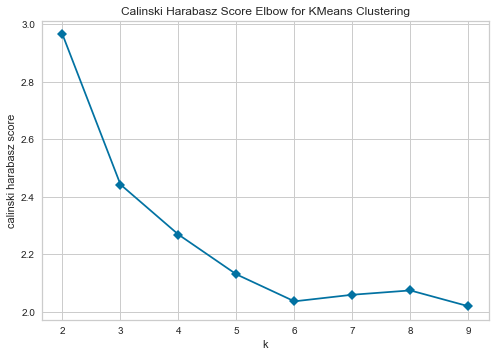

In [221]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(city_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Run K-means Clustering

In [222]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 5, 2, 4, 2, 0, 3, 1, 2], dtype=int32)

In [223]:
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [224]:
city_merged = cities

city_merged = city_merged.join(city_venues_sorted.set_index('Name'), on='Name')

city_merged

,Name,Latitude,Longitude,Radius,Limit,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Toronto, Canada",43.64869,-79.38544,5000,300,2,Coffee Shop,Park,Bakery,Café,Dessert Shop,Sandwich Place,Restaurant,Dance Studio,Japanese Restaurant,Farmers Market
1,"Sydney, Australia",-33.86960,151.20691,5000,300,3,Café,Park,Cocktail Bar,Hotel,Coffee Shop,Thai Restaurant,Ice Cream Shop,Theater,Bakery,Bookstore
2,Singapore,1.29041,103.85211,5000,300,0,Hotel,Waterfront,Coffee Shop,Wine Bar,Event Space,Park,Performing Arts Venue,Art Gallery,Garden,Bistro
3,"São Paulo, Brazil",-23.56287,-46.65468,5000,300,1,Ice Cream Shop,Italian Restaurant,Art Museum,Theater,Pizza Place,Bookstore,Park,Restaurant,Hotel,Dance Studio
4,"San Francisco, US",37.77712,-122.41964,5000,300,2,Bakery,Coffee Shop,Grocery Store,Pizza Place,Yoga Studio,Park,Gym / Fitness Center,Dance Studio,Marijuana Dispensary,Restaurant
5,"New York City, US",40.71455,-74.00714,5000,300,2,Park,Memorial Site,Bakery,Italian Restaurant,Theater,Garden,Hotel,Ice Cream Shop,Yoga Studio,Dance Studio
6,"Paris, France",48.85717,2.34140,5000,300,4,Plaza,Hotel,Ice Cream Shop,Bookstore,Garden,Wine Bar,Art Museum,Sandwich Place,Fountain,Coffee Shop
7,"Los Angeles, US",34.05349,-118.24532,5000,300,5,Coffee Shop,Brewery,American Restaurant,Taco Place,Plaza,Theater,Bakery,Italian Restaurant,Art Gallery,Concert Hall
8,"London, UK",51.50642,-0.12721,5000,300,0,Hotel,Theater,Park,Plaza,Grocery Store,Hotel Bar,Wine Bar,Art Gallery,History Museum,Bookstore
9,"Amsterdam, Netherlands",52.36993,4.90788,5000,300,4,Hotel,Coffee Shop,Ice Cream Shop,Bookstore,Canal,Bar,Breakfast Spot,Cocktail Bar,Bakery,Plaza


## Results and Discussion <a name="results"></a>

In [227]:
city_merged[['Name', 'Cluster Labels']]

,Name,Cluster Labels
0,"Toronto, Canada",2
1,"Sydney, Australia",3
2,Singapore,0
3,"São Paulo, Brazil",1
4,"San Francisco, US",2
5,"New York City, US",2
6,"Paris, France",4
7,"Los Angeles, US",5
8,"London, UK",0
9,"Amsterdam, Netherlands",4


From the analysis, I found that Northern American cities, Toronto, San Francisco, New York City are more similar, except Los Angeles. European cities, Paris and Armsterdam, are similar to each other. Singapore and London belong to the same cluster. Other cities, Sao Paulo and Sydney both belong to its own cluster.

As we only have 10 cities for the clustering, from the result, we can roughly group the cities based on their locations. For example, Northern American, Latin American, Oceanian, European, etc. For Singapore and London cluster, it might because Singapore used to be part of UK and is still having close relationship with UK.

## Conclusion <a name="conclusion"></a>

There might be many factors affected the formation of large multicultural cities, location is definitely one of most important one. Other than location, history also plays important part. 

To further study the multicultural cities, more cities are needed. And as there's limitation in Foursqure API for the number of venues returned, division of the center area is also required.